IMPORTACIÓN DE LIBRERIAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ASIGNACIÓN DE DATAFRAME CORRESPONDIENTE PARA EL EDA

In [4]:
df = pd.read_csv("/content/comentarios-avolta.csv")

CALCULO DE LA MEDIA DE LONGITUD DE LOS VERBATIMS EN EL DATASET

Media de longitud: 45.56358118361153 caracteres por VERBATIM


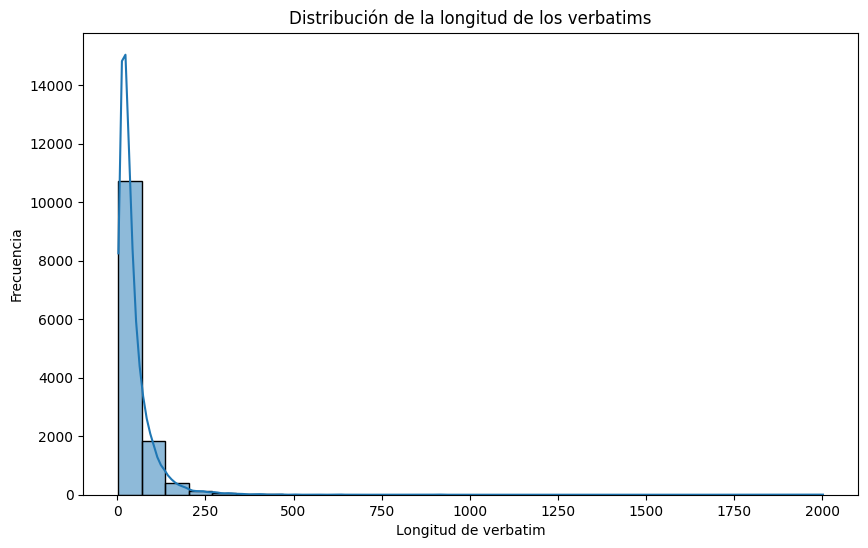

In [71]:
df['long'] = df['VERBATIM']
contador = 0;
for i in range(len(df['long'])):
  contador += len(df['long'][i])

media = contador/len(df['long'])

print(f'Media de longitud: ' + str(media) + ' caracteres por VERBATIM')

plt.figure(figsize=(10, 6))
sns.histplot(df['long'].apply(len), bins=30, kde=True)
plt.title('Distribución de la longitud de los verbatims')
plt.xlabel('Longitud de verbatim')
plt.ylabel('Frecuencia')
plt.show()



CALCULO DE CANTIDAD DE VECES QUE SE REPITE UNA PALABRA

Palabra: 'the', Repeticiones: 5131
Palabra: 'very', Repeticiones: 4804
Palabra: 'and', Repeticiones: 4005
Palabra: 'was', Repeticiones: 2755
Palabra: 'i', Repeticiones: 2319
Palabra: 'me', Repeticiones: 2014
Palabra: 'to', Repeticiones: 1962
Palabra: 'a', Repeticiones: 1929
Palabra: 'good', Repeticiones: 1819
Palabra: 'service', Repeticiones: 1590
Palabra: 'is', Repeticiones: 1493
Palabra: 'for', Repeticiones: 1169
Palabra: 'kind', Repeticiones: 1157
Palabra: 'in', Repeticiones: 1047
Palabra: 'of', Repeticiones: 1028
Palabra: 'you', Repeticiones: 938
Palabra: 'friendly', Repeticiones: 920
Palabra: 'excellent', Repeticiones: 912
Palabra: 'nice', Repeticiones: 850
Palabra: 'with', Repeticiones: 823
Palabra: 'it', Repeticiones: 815
Palabra: 'helpful', Repeticiones: 810
Palabra: 'great', Repeticiones: 803
Palabra: 'staff', Repeticiones: 796
Palabra: 'helped', Repeticiones: 787
Palabra: 'thank', Repeticiones: 681
Palabra: 'attention', Repeticiones: 659
Palabra: 'from', Repeticiones: 636
Pal

<ipython-input-70-4fd1e71f4450>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(common_words.values()), y=list(common_words.keys()), palette="viridis")


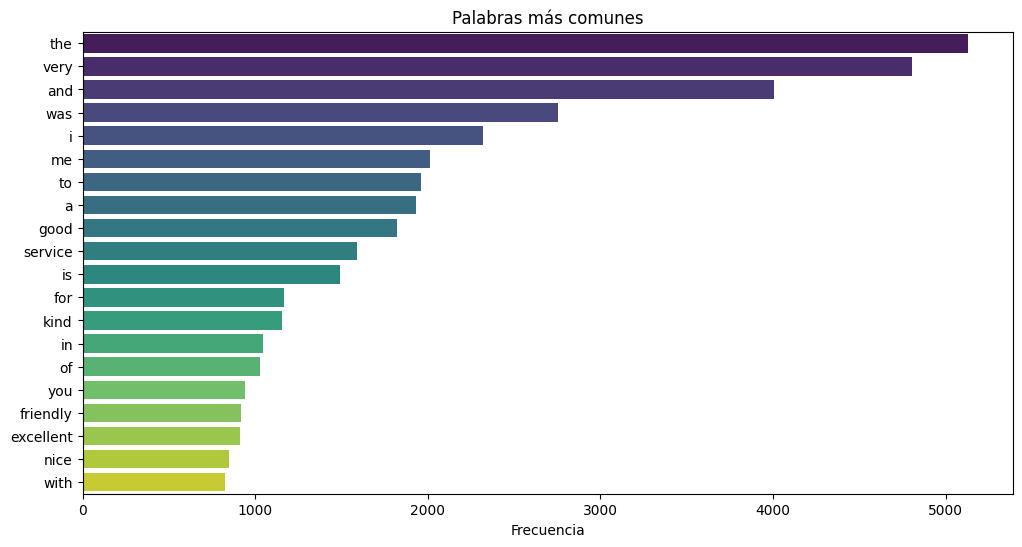

In [70]:
from collections import Counter

def count_word_occurrences(dataframe, column_name):
    word_counts = Counter()
    for text in dataframe[column_name]:
        words = re.findall(r'\b\w+\b', text.lower())
        word_counts.update(words)
    return word_counts

word_occurrences = count_word_occurrences(df, 'VERBATIM')

for word, count in word_occurrences.most_common(100): #Cambiar el numero para ver menos o mas palabras
    print(f"Palabra: '{word}', Repeticiones: {count}")

common_words = dict(Counter(word_occurrences).most_common(20))
plt.figure(figsize=(12, 6))
sns.barplot(x=list(common_words.values()), y=list(common_words.keys()), palette="viridis")
plt.title('Palabras más comunes')
plt.xlabel('Frecuencia')
plt.show()


ANALISIS Y GRAFICO DE SENTIMIENTO DE LOS VERBATIMS

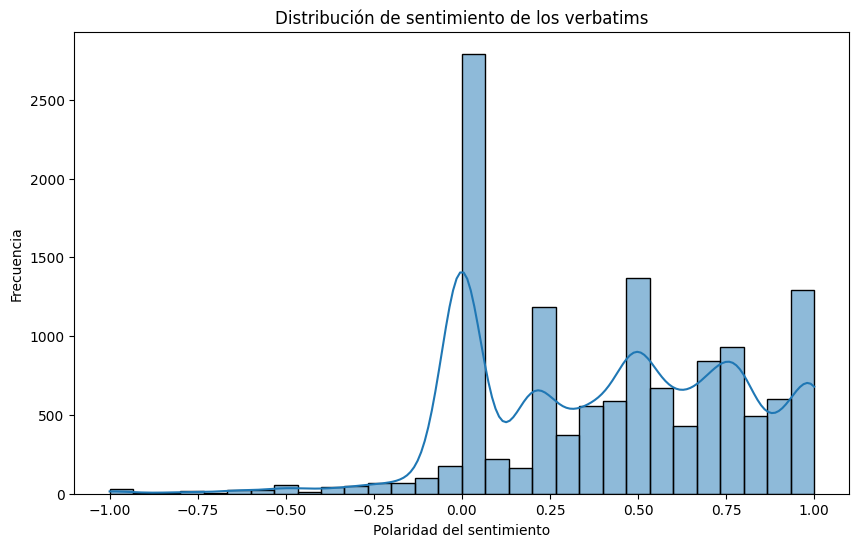

In [47]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['VERBATIM'].apply(get_sentiment)

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribución de sentimiento de los verbatims')
plt.xlabel('Polaridad del sentimiento')
plt.ylabel('Frecuencia')
plt.show()


CALCULO DE BIAGRAMS Y TIAGRAMAS MAS COMUNES

Bigramas más comunes:  [('good service', 368), ('excellent service', 256), ('customer service', 224), ('great service', 135), ('helped lot', 133), ('duty free', 114), ('excellent attention', 109), ('good attention', 106), ('friendly staff', 91), ('cristina gutierrez', 77), ('ana lópez', 71), ('super friendly', 70), ('friendly helpful', 68), ('kind helpful', 67), ('staff friendly', 60), ('kind helped', 55), ('self checkout', 52), ('excellent customer', 52), ('really nice', 52), ('super nice', 51)]
Trigramas más comunes:  [('excellent customer service', 48), ('great customer service', 30), ('good customer service', 29), ('ana helped lot', 23), ('ana lópez helped', 14), ('kind helped lot', 14), ('gave good advice', 11), ('self checkout counters', 10), ('good service friendly', 10), ('ana lopez treated', 10), ('cristina gutierrez treated', 10), ('helped lot purchase', 10), ('took great care', 9), ('helpful friendly staff', 9), ('provided excellent service', 9), ('ana lópez treated', 9), ('

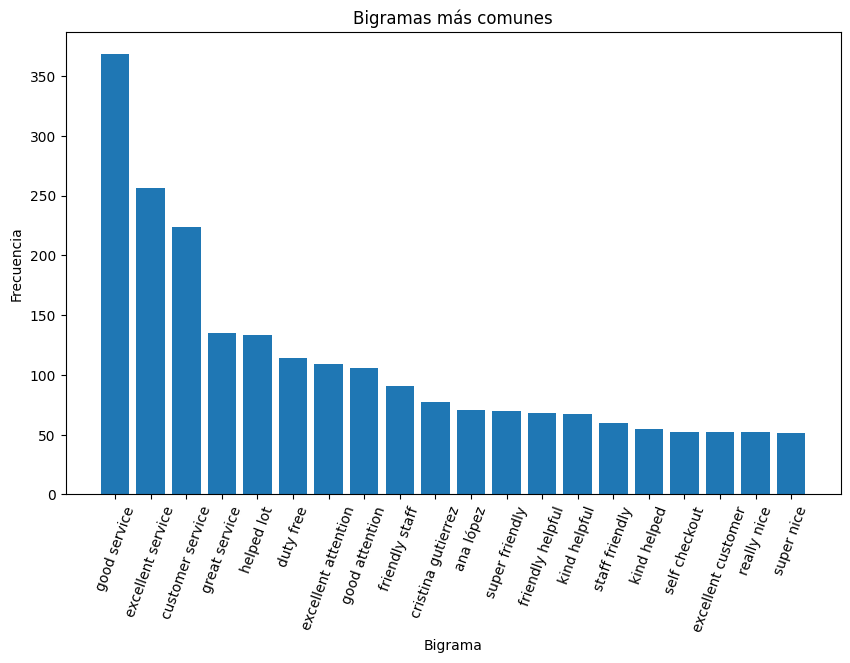

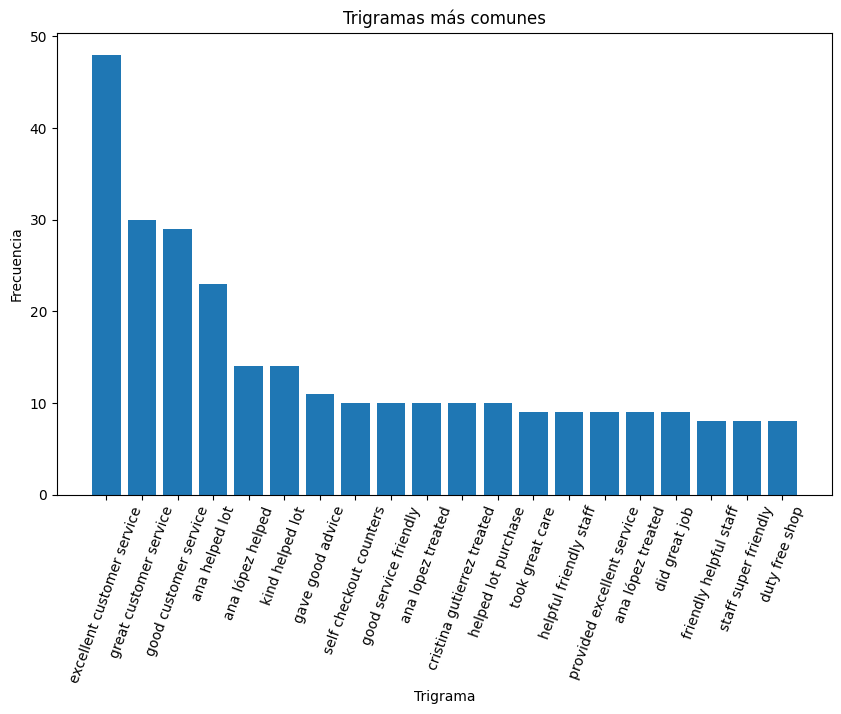

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

def get_ngrams(corpus, n=None):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(corpus)
    ngrams_freq = ngrams.sum(axis=0).tolist()[0]
    vocab = vectorizer.vocabulary_
    sorted_ngrams = sorted([(word, ngrams_freq[idx]) for word, idx in vocab.items()], key=lambda x: x[1], reverse=True)
    return sorted_ngrams[:20]

bigrams = get_ngrams(df['VERBATIM'], 2)
print("Bigramas más comunes: ", bigrams)

trigrams = get_ngrams(df['VERBATIM'], 3)
print("Trigramas más comunes: ", trigrams)

plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in bigrams], [x[1] for x in bigrams])
plt.title('Bigramas más comunes')
plt.xlabel('Bigrama')
plt.ylabel('Frecuencia')
plt.xticks(rotation=70)
plt.show()

print(' ')

plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in trigrams], [x[1] for x in trigrams])
plt.title('Trigramas más comunes')
plt.xlabel('Trigrama')
plt.ylabel('Frecuencia')
plt.xticks(rotation=70)
plt.show()


WORDCLOUD DE DATASET

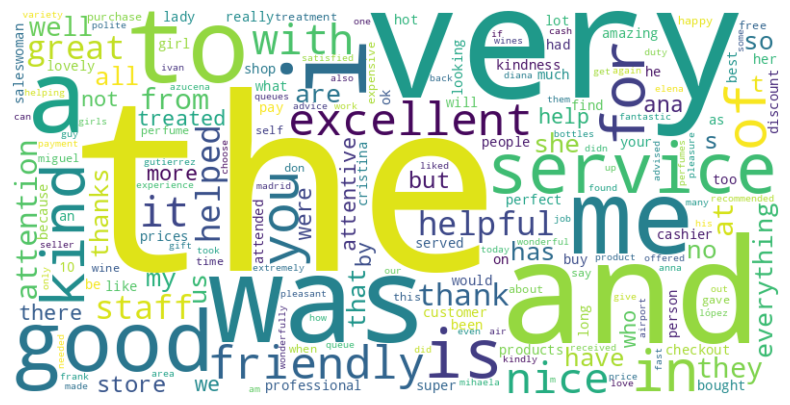

In [29]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_occurrences)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

CALCULO DE VERBATIMS CON MENOS DE 10 CARACTERES

In [44]:
df['long'] = df['VERBATIM']
contador = 0;
for i in range(len(df['long'])):
  if (len(df['long'][i]) < 10): #CAMBIAR EL NUMERO PARA COMPROBAR OTRO TIPO DE LONGITUD DE CARACTERES
    contador += 1

print(f'De ' + str(len(df['long'])) + ' VERBATIMS, ' + str(contador) + ' contienen menos de 10 caracteres')



De 13180 VERBATIMS, 1471 contienen menos de 10 caracteres


CALCULO DE VERBATIMS CON UNA UNICA PALABRA

In [45]:
contador = 0
for i in range(len(df['VERBATIM'])):
    if ' ' not in df['VERBATIM'][i]:
        contador += 1
print(f'De {len(df["VERBATIM"])} VERBATIMS, {contador} contienen una única palabra')

De 13180 VERBATIMS, 1728 contienen una única palabra


CALCULO DE VERBATIMS QUE CONTIENEN EMOJIS

In [46]:
import re

def contains_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(text))

emoji_count = 0
for verbatim in df['VERBATIM']:
    if contains_emoji(verbatim):
        emoji_count += 1

print(f'De {len(df["VERBATIM"])} VERBATIMS, {emoji_count} contienen emojis')

De 13180 VERBATIMS, 127 contienen emojis


CALCULO DE VERBATIMS OUTLIERS `( UN OUTLIER ES UN VALOR ATIPICO EN UN DATASET QUE TOMA UN VALOR SIGNIFICATIVAMENTE DISTINTO AL RESTO )`

In [69]:
Q1 = df['long'].apply(len).quantile(0.25)
Q3 = df['long'].apply(len).quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['long'].apply(len) < (Q1 - 1.5 * IQR)) | (df['long'].apply(len) > (Q3 + 1.5 * IQR))]

print(f'Número de verbatims outliers: {len(outliers)}')


Número de verbatims outliers: 906
